In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [147]:
df = pd.read_csv('telco_dataset.csv')

In [148]:
churn_dist = df['Churn'].value_counts()
churn_dist

Churn
0    5174
1    1869
Name: count, dtype: int64

In [149]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,AvgChargesPerMonth
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,29.850000
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,1889.50,0,55.573529
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,108.15,1,54.075000
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),1840.75,0,40.905556
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,151.65,1,75.825000


In [151]:
df = df[~np.isinf(df['AvgChargesPerMonth'])]


In [152]:
df_filtered = df.drop(['customerID', 'TotalCharges'], axis = 1)

In [153]:
df_filtered

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,AvgChargesPerMonth
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0,29.850000
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0,55.573529
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1,54.075000
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0,40.905556
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,0,82.937500
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),0,102.262500
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0,31.495455
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,1,76.650000


In [154]:
# Step 1: Identify variable types
# Identify binary numeric variables (already in 0 and 1) and treat them as categorical
binary_numeric_list = df_filtered.columns[(df_filtered.nunique() == 2) & (df_filtered.dtypes.isin(['int64', 'float64']))]  # Binary numeric variables
categorical_list = df_filtered.select_dtypes(include=['object']).columns  # Categorical variables
quantitative_list = df_filtered.select_dtypes(include=['int64', 'float64']).columns.difference(binary_numeric_list)  # True quantitative variables

# Ensure 'AvgChargesPerMonth' remains in quantitative_list, and 'Churn' is treated as the target
quantitative_list = quantitative_list.union(['AvgChargesPerMonth'])

# Step 2: One-Hot encode only the non-binary categorical variables (drop_first=True to avoid redundancy)
data_encoded = pd.get_dummies(df_filtered[categorical_list], drop_first=True)

# Step 3: Combine the quantitative variables, binary variables (as is), and encoded categorical variables
# Remove 'Churn' from the features before combining
data_combined = pd.concat([df_filtered[quantitative_list], df_filtered[binary_numeric_list], data_encoded], axis=1)

# Step 4: Standardize the combined dataset (excluding 'Churn')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_combined)

# Output the shape of the combined dataset and check the structure
print(f"Data shape after encoding: {data_combined.shape}")
data_combined.head()


Data shape after encoding: (7032, 23)


,AvgChargesPerMonth,Churn,Dependents,DeviceProtection,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PhoneService,...,TechSupport,gender,tenure,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.850000,0,0,0,0,1,0,1,1,0,...,0,0,1,False,False,False,False,False,True,False
1,55.573529,0,0,1,0,0,1,0,0,1,...,0,1,34,False,False,True,False,False,False,True
2,54.075000,1,0,0,0,1,1,1,0,1,...,0,1,2,False,False,False,False,False,False,True
3,40.905556,0,0,1,0,0,1,0,0,0,...,1,1,45,False,False,True,False,False,False,False
4,75.825000,1,0,0,0,0,0,1,0,1,...,0,0,2,True,False,False,False,False,True,False


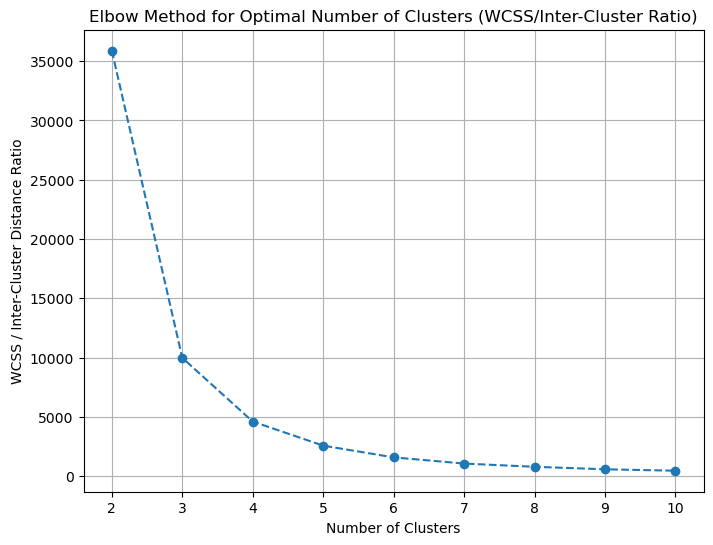

In [155]:
ratios = []  # List to store the ratio of within-cluster and inter-cluster sum of squares

# Calculate the ratio for k values from 2 to 10
for i in range(2, 11):  # Starting from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    
    # Calculate WCSS (within-cluster sum of squares)
    wcss = kmeans.inertia_
    
    # Calculate inter-cluster distances using cluster centers
    cluster_centers = kmeans.cluster_centers_
    inter_cluster_distances = np.sum(np.tril(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2)))
    
    # Calculate ratio of within-cluster to inter-cluster distance
    ratio = wcss / inter_cluster_distances if inter_cluster_distances != 0 else np.nan
    ratios.append(ratio)

# Step 6: Plot the ratio graph (Elbow method based on the ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ratios, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (WCSS/Inter-Cluster Ratio)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS / Inter-Cluster Distance Ratio')
plt.grid(True)
plt.show()

In [156]:
from sklearn.cluster import KMeans

# Perform K-means clustering with a specified number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original data_combined DataFrame for analysis
data_combined['Cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print("\nNumber of data points in each cluster:")
print(data_combined['Cluster'].value_counts())



Number of data points in each cluster:
Cluster
1    2592
0    2333
2    2107
Name: count, dtype: int64


In [157]:
data_combined.columns

Index(['AvgChargesPerMonth', 'Churn', 'Dependents', 'DeviceProtection',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PhoneService', 'SeniorCitizen', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender', 'tenure',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Cluster'],
      dtype='object')

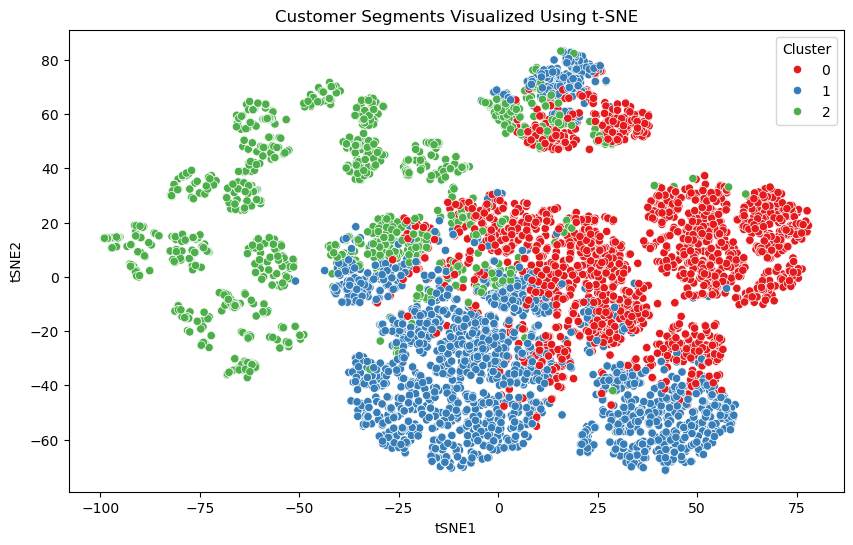

In [158]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Adding t-SNE components to the dataset
temp = data_combined.drop(['Churn'], axis = 1)
temp['tSNE1'] = tsne_components[:, 0]
temp['tSNE2'] = tsne_components[:, 1]

# Plotting t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temp['tSNE1'], y=temp['tSNE2'], hue=temp['Cluster'], palette='Set1')
plt.title('Customer Segments Visualized Using t-SNE')
plt.show()


In [160]:
# Step 1: Define the target variable (assuming 'Churn' is the target for classification)
X = data_combined.drop(columns=['Churn', 'Cluster'])  # Features
y = data_combined['Churn']  # Target

# Step 2: Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 3: Get feature importance
feature_importances = rf.feature_importances_

# Step 4: Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance rankings
print(feature_importance_df)

                                  Feature  Importance
14                                 tenure    0.242180
0                      AvgChargesPerMonth    0.240002
15            InternetService_Fiber optic    0.044758
20         PaymentMethod_Electronic check    0.040165
18                      Contract_Two year    0.035530
13                                 gender    0.033155
6                        PaperlessBilling    0.030381
12                            TechSupport    0.027867
5                          OnlineSecurity    0.027789
7                                 Partner    0.027358
4                            OnlineBackup    0.026635
17                      Contract_One year    0.026330
9                           SeniorCitizen    0.024641
3                           MultipleLines    0.023851
1                              Dependents    0.023801
2                        DeviceProtection    0.023246
10                        StreamingMovies    0.021524
11                          

## Dameli : Feature Engineering + Scaling + Running Clusters :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('telco_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.fillna(df["TotalCharges"].median())

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

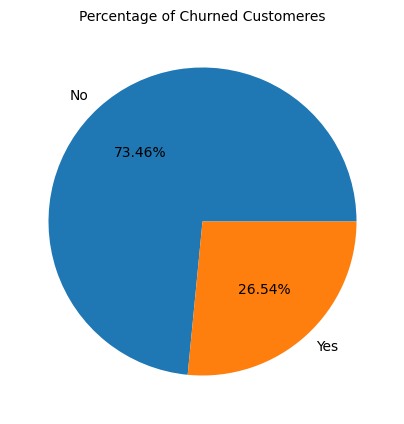

In [8]:
plt.figure(figsize = (5,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

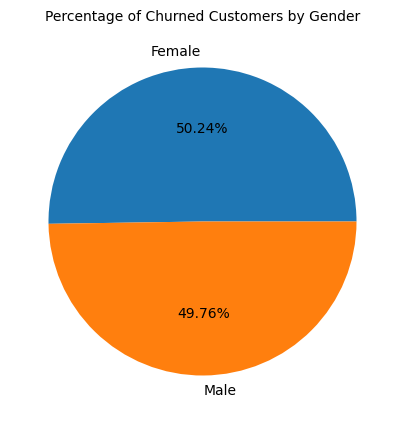

In [9]:
churned_customers = df[df['Churn'] == 'Yes']
gb = churned_customers.groupby("gender").agg({'gender': "count"})
plt.figure(figsize=(5, 5))
plt.pie(gb['gender'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers by Gender", fontsize=10)
plt.show()

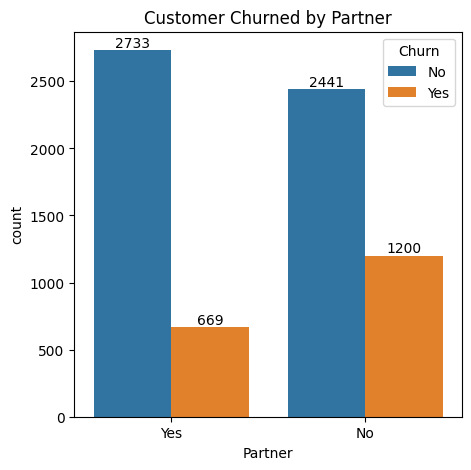

In [10]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by Partner')
ax = sns.countplot(x = 'Partner',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

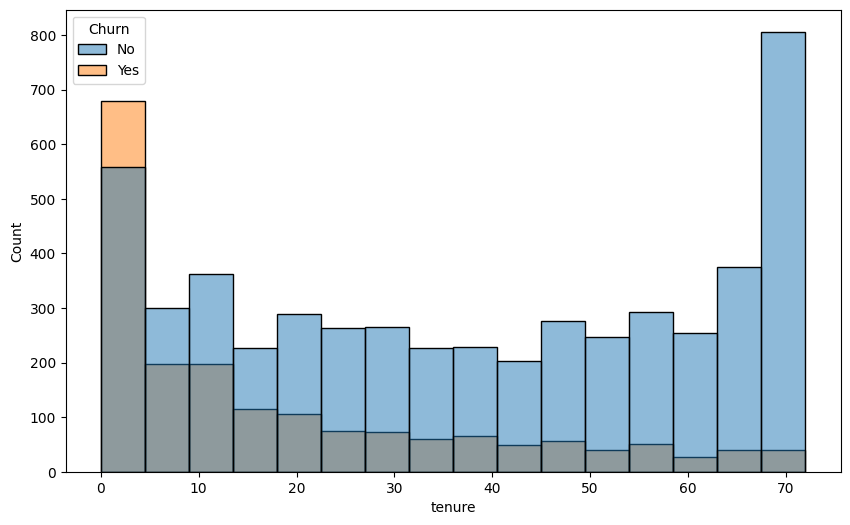

In [11]:
# Let's SEE TENURE YES/NO AND HOW LONG:
plt.figure(figsize = (10,6))
sns.histplot(x = 'tenure', data = df, hue= 'Churn')
plt.show()

### people who have used our services for a long time have stayed and people who have used our sevices #1 or 2 months have churned

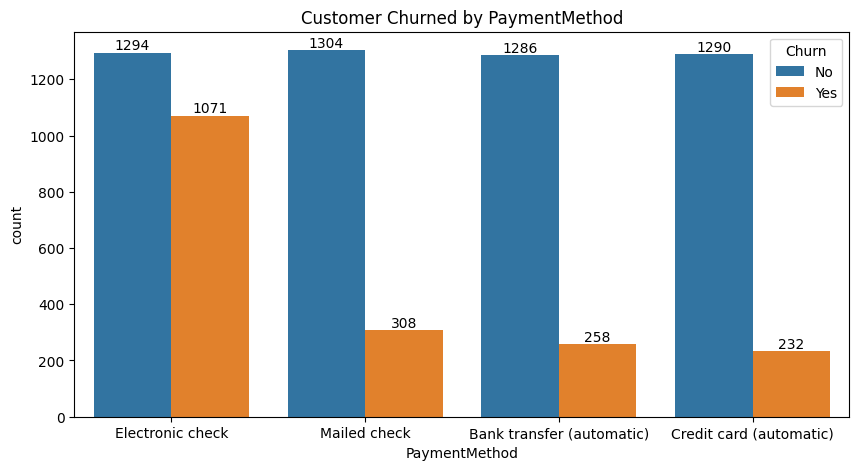

In [15]:
plt.figure(figsize = (10,5))
plt.title('Customer Churned by PaymentMethod')
ax = sns.countplot(x = 'PaymentMethod', data = df, hue= 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Electronic Check have high risk to churnout

In [12]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

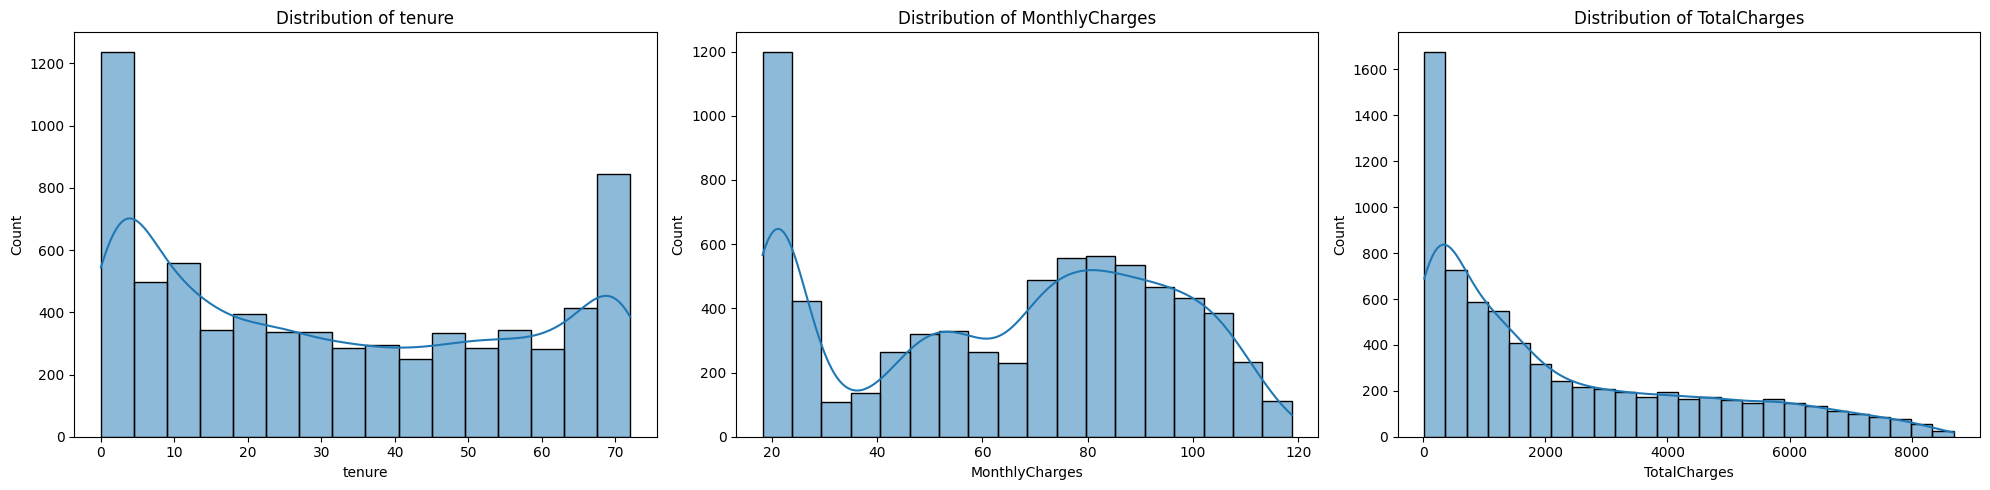

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

In [14]:
# Okay what Customer Value Lifteme : it's Tenure * Monthly Cvharges

# Now, we start Feauture Engineering:

#Feature Engineering for EDA
df['CLV'] = df['tenure'] * df['MonthlyCharges']

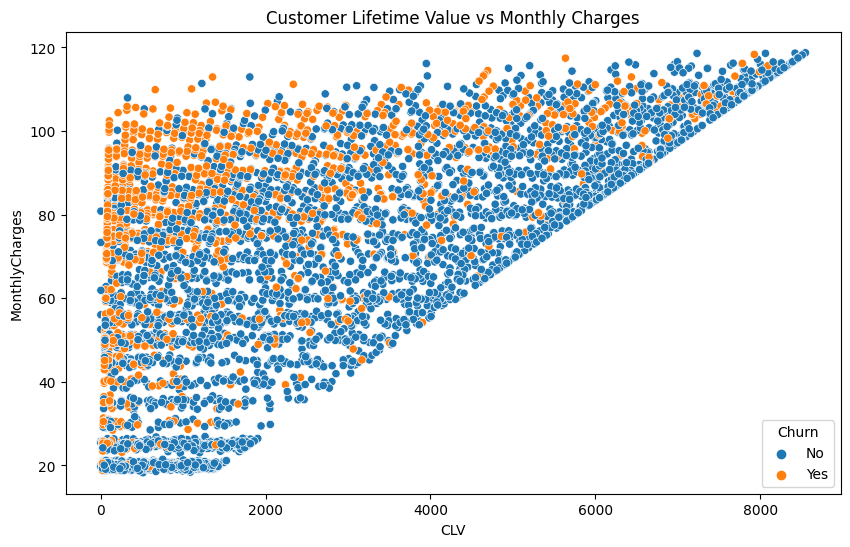

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Customer Lifetime Value vs Monthly Charges')
plt.show()

## We see from here, that from those who have churned --> their CLV is short and MonthlyCharges are spread mostly between 70 to 100

## Also we know that Churn mostly affected by the Tenure : so, let's group it and see!

In [16]:
df['TenureBin'] = pd.cut(df['tenure'], 
                         bins=[0, 12, 24, 36, 48, 60, np.inf], 
                         labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
                         )

### Let us also add AverageMonthly charges:

In [17]:
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlyCharges'].fillna(df['MonthlyCharges'], inplace = True)

### So 3 new feautues: CLV, TenureBin, AvgMonthCharges

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CLV',
       'TenureBin', 'AvgMonthlyCharges'],
      dtype='object')

In [19]:
# Services-related Features
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = df[services].notnull().sum(axis=1)

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CLV',
       'TenureBin', 'AvgMonthlyCharges', 'TotalServices'],
      dtype='object')

In [20]:
# Aggregated Features
df['AvgCLVbyTenureBin'] = df.groupby('TenureBin')['CLV'].transform('mean')

In [21]:
# Convert 'Churn' column to numeric binary values
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [22]:
# Now, let's scale and do encoding:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Binary Encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_cols] = df[binary_cols].apply(lambda x: LabelEncoder().fit_transform(x))


In [23]:
# Target Encoding (for illustration, using mean Churn rate per category)
for col in ['Contract', 'PaymentMethod', 'InternetService']:
    target_mean = df.groupby(col)['Churn'].mean()
    df[f'{col}_churn_encoded'] = df[col].map(target_mean)

In [51]:
df.Contract_churn_encoded

0       0.427097
1       0.112695
2       0.427097
3       0.112695
4       0.427097
          ...   
7038    0.112695
7039    0.112695
7040    0.427097
7041    0.427097
7042    0.028319
Name: Contract_churn_encoded, Length: 7043, dtype: float64

In [32]:
# Select features for clustering
features = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'CLV', 'TotalServices',
               
               'AvgCLVbyTenureBin', 'gender', 'SeniorCitizen'] +
              [f'{col}_churn_encoded' for col in ['Contract', 'PaymentMethod', 'InternetService']]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [25]:

# Fill NaNs in the categorical column 'TenureBin' with its mode
df['TenureBin'] = df['TenureBin'].fillna(df['TenureBin'].mode()[0])

# Fill NaNs in the numeric column 'AvgCLVbyTenureBin' with its median
df['AvgCLVbyTenureBin'] = df['AvgCLVbyTenureBin'].fillna(df['AvgCLVbyTenureBin'].median())


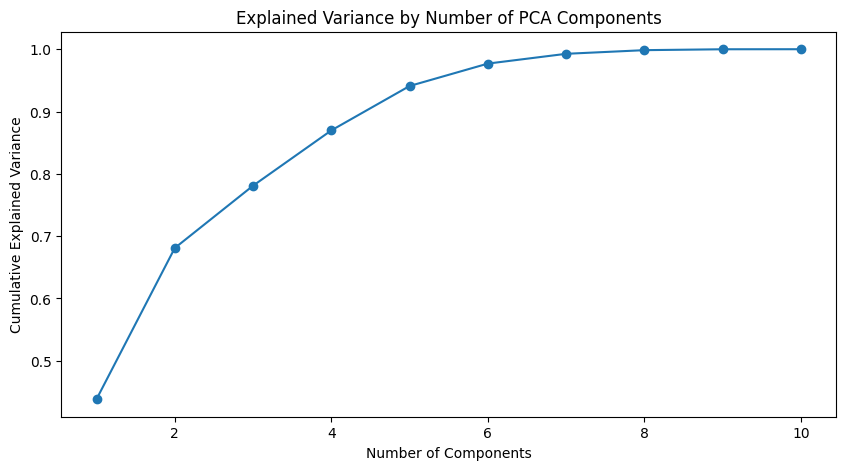

In [36]:
# Now, let's run PCA:

# PCA for Dimensionality Reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Visualize Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [37]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
print(f"K-Means Silhouette Score: {silhouette_score(X_pca, kmeans_labels):.4f}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.2651


In [38]:
from sklearn.manifold import TSNE

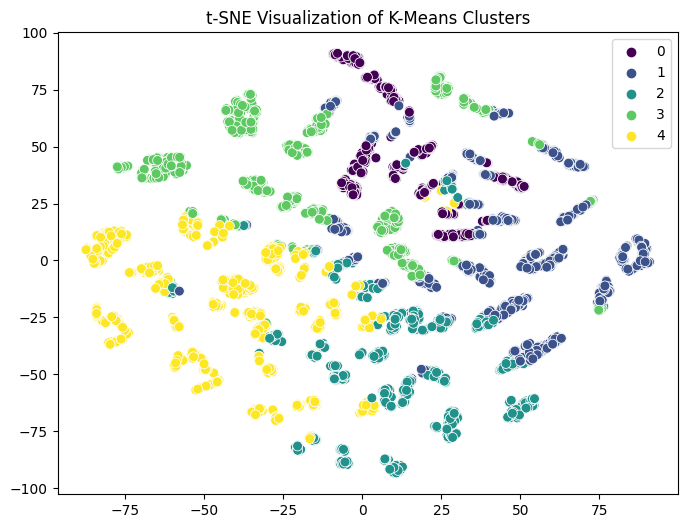

In [39]:
# 2. t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.show()

### No, 5 clusters - too much similarities will be defined in different clusters!!!

# Let's go with 3 !

In [29]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
print(f"K-Means Silhouette Score: {silhouette_score(X_pca, kmeans_labels):.4f}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.2726


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

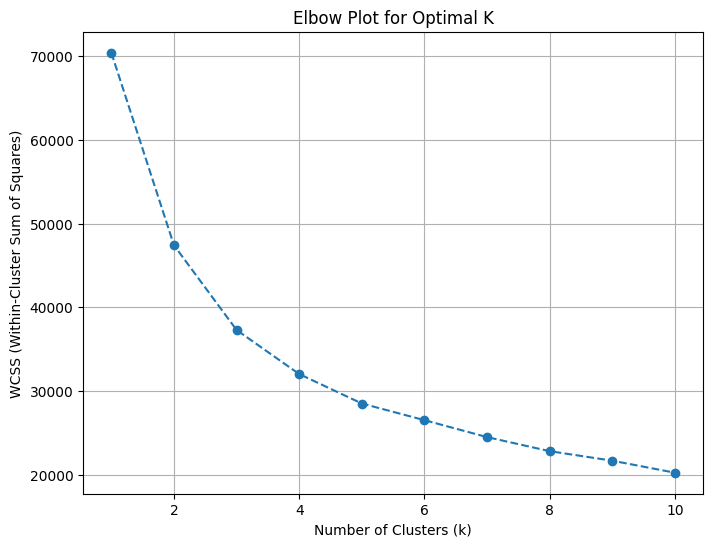

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_pca is your feature set after dimensionality reduction with PCA

# Step 1: Calculate WCSS for different values of k
wcss = []
k_values = range(1, 11)  # We will check for 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Step 2: Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


In [34]:
df.to_csv('telecom_data_clusters_Dami.csv', index=False)

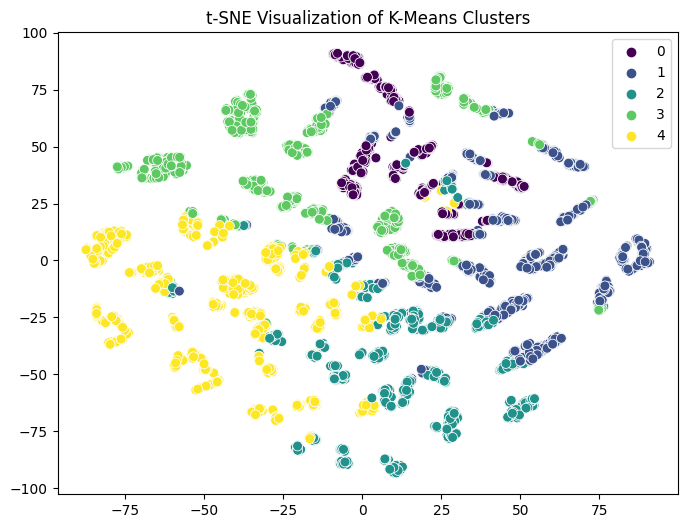

In [42]:
# 2. t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.show()

Agglomerative Clustering Silhouette Score: 0.2205


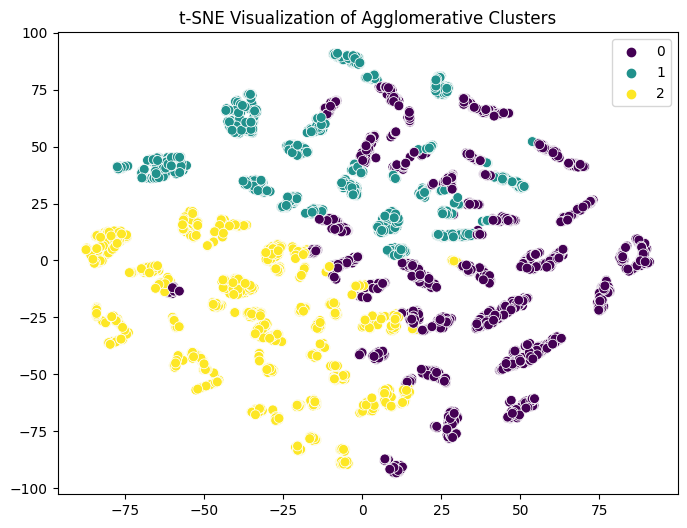

In [66]:
### DONT USE IT 

# ANother type of clustering:
# 4. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_pca)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_score(X_pca, agglo_labels):.4f}")

# Plot Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=agglo_labels, palette='viridis', s=50)
plt.title('t-SNE Visualization of Agglomerative Clusters')
plt.show()

## We see that Aglomerative performs worse than K-Means, so we will go with K-Means!

## So, let's now move to the prediction of Churn in each  cluster:

In [43]:
# List of categorical columns to be encoded
categorical_columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod', 'TenureBin']

# Use one-hot encoding to convert categorical columns to numeric
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [44]:
# handling too-large values:
# Step 1: Replace infinite values with NaN (then handle as needed)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Fill NaNs resulting from infinite values (if any) with a strategy (mean, median, or constant)
# Here, we're using column means for illustration
df.fillna(df.mean(), inplace=True)

# Step 3: Optional - Cap extreme values to a maximum threshold (e.g., 99th percentile for each column)
# This step prevents issues with extremely large values that are valid but might skew results
for col in df.select_dtypes(include=[np.number]).columns:  # Apply only to numeric columns
    upper_limit = df[col].quantile(0.99)  # Define upper limit as 99th percentile
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


/var/folders/h4/p1vt_7rd5kj63h5glf11cknh0000gn/T/ipykernel_5103/1480268042.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [45]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
#from sklearn.feature_selection import permutation_importance

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Classification per Cluster
for cluster in sorted(df['Cluster'].unique()):  # Sort to ensure clusters 0, 1, 2 are iterated in order
    print(f"\n--- Cluster {cluster} ---")

    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]
    
    # Separate features and target
    X = cluster_data.drop(columns=['Churn', 'Cluster', 'customerID'])  # Remove irrelevant columns
    y = cluster_data['Churn']
    
    # Step 4: Handle Imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Step 5: Split Data
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Step 6: Train a Classification Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 7: Evaluate Model
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 8: Variable Importance
    feature_importances = model.feature_importances_

    feature_importances_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)
    
    print("\nVariable Importance:")
    print(feature_importances_df)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



--- Cluster 0 ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       719
         1.0       0.92      0.89      0.91       690

    accuracy                           0.91      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.91      0.91      0.91      1409


Variable Importance:
                                  feature  importance
12                 Contract_churn_encoded    0.097981
7                            TotalCharges    0.088756
4                                  tenure    0.071916
8                                     CLV    0.070380
9                       AvgMonthlyCharges    0.056393
6                          MonthlyCharges    0.052436
2                                 Partner    0.049407
11                      AvgCLVbyTenureBin    0.039209
33                      Contract_Two year    0.036520
5                        PaperlessBilling    0.036035
3             

In [45]:
df.to_csv('telecom_data_clusters_Dami.csv', index=False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   float64
 2   SeniorCitizen                          7043 non-null   float64
 3   Partner                                7043 non-null   float64
 4   Dependents                             7043 non-null   float64
 5   tenure                                 7043 non-null   float64
 6   PaperlessBilling                       7043 non-null   float64
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   float64
 10  CLV                                    7043 non-null   float64
 11  AvgM

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.cluster import KMeans

# Assuming `df` is your dataset and `X_scaled` is your scaled feature matrix

# Step 1: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Specify the cluster you want to analyze
cluster = 1  # Change this to 0, 1, or 2 as needed

# Filter data for the specified cluster
print(f"\n--- Analysis for Cluster {cluster} ---")
cluster_data = df[df['Cluster'] == cluster]

# Separate features and target
X = cluster_data.drop(columns=['Churn', 'Cluster', 'customerID'])  # Drop irrelevant columns
y = cluster_data['Churn']

# Step 2: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 4: Train a Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Variable Importance
feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("\nVariable Importance:")
print(feature_importances_df)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



--- Analysis for Cluster 1 ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       546
         1.0       0.96      0.88      0.92       512

    accuracy                           0.93      1058
   macro avg       0.93      0.92      0.92      1058
weighted avg       0.93      0.93      0.93      1058


Variable Importance:
                                  feature  importance
12                 Contract_churn_encoded    0.091986
33                      Contract_Two year    0.081156
35         PaymentMethod_Electronic check    0.062249
21                     OnlineSecurity_Yes    0.057993
27                        TechSupport_Yes    0.052804
13            PaymentMethod_churn_encoded    0.050107
9                       AvgMonthlyCharges    0.047894
4                                  tenure    0.046691
6                          MonthlyCharges    0.044732
8                                     CLV    0.044445
7

In [47]:
# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Classification per Cluster
for cluster in df['Cluster'].unique():  # Sort to ensure clusters 0, 1, 2 are iterated in order
    print(f"\n--- Cluster {cluster} ---")

    # Filter data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]
    
    # Separate features and target
    X = cluster_data.drop(columns=['Churn', 'Cluster', 'customerID'])  # Remove irrelevant columns
    y = cluster_data['Churn']
    
    # Step 4: Handle Imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Step 5: Split Data
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Step 6: Train a Classification Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 7: Evaluate Model
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 8: Variable Importance
    feature_importances = model.feature_importances_

    feature_importances_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)
    
    print("\nVariable Importance:")
    print(feature_importances_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



--- Cluster 2 ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       364
         1.0       0.72      0.66      0.69       392

    accuracy                           0.69       756
   macro avg       0.69      0.69      0.69       756
weighted avg       0.69      0.69      0.69       756


Variable Importance:
                                  feature  importance
7                            TotalCharges    0.132629
8                                     CLV    0.129117
6                          MonthlyCharges    0.119926
9                       AvgMonthlyCharges    0.119820
4                                  tenure    0.093977
5                        PaperlessBilling    0.029796
0                                  gender    0.026117
17                      MultipleLines_Yes    0.025390
2                                 Partner    0.023619
23                       OnlineBackup_Yes    0.023267
1             

### STEP 5: FEATURE IMPORTANCE & ITS INFLUENCE ON CHURN : 

In [57]:
probabilities_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,CLV,AvgMonthlyCharges,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureBin_1-2 Years,TenureBin_2-3 Years,TenureBin_3-4 Years,TenureBin_4-5 Years,TenureBin_5+ Years,Churn_Probability
325,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,97.450000,6253.000000,6139.350000,99.253968,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.29
2339,0.000000,0.000000,0.000000,0.000000,41.570610,1.000000,105.672329,4419.084964,4392.593646,106.324308,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.92
3414,0.008863,0.000000,0.000000,0.000000,55.955684,0.991137,73.904509,4094.175061,4135.107201,73.176097,...,0.000000,0.008863,0.991137,0.000000,0.0,0.0,0.0,1.0,0.0,0.60
746,1.000000,0.000000,1.000000,0.000000,45.000000,1.000000,84.550000,3713.950000,3804.750000,82.532222,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.30
299,1.000000,1.000000,1.000000,0.000000,62.000000,1.000000,103.750000,6383.350000,6432.500000,102.957258,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,1.000000,0.000000,0.753962,0.000000,65.507924,1.000000,104.443661,6893.223099,6841.293773,105.246953,...,0.000000,0.246038,0.753962,0.000000,0.0,0.0,0.0,0.0,1.0,0.87
1149,0.000000,0.000000,1.000000,0.000000,72.000000,1.000000,110.450000,7982.500000,7952.400000,110.868056,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.04
1945,1.000000,1.000000,1.000000,0.000000,51.000000,1.000000,93.650000,4839.150000,4776.150000,94.885294,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.20
2618,0.000000,0.527041,0.000000,0.472959,44.310710,1.000000,104.828634,4660.342106,4614.146772,105.881582,...,0.472959,0.000000,0.527041,0.472959,0.0,0.0,1.0,0.0,0.0,1.00


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Get the top 5 features by importance
top_5_features = feature_importances_df['feature'].head(5).values



# Predict probabilities instead of classes
y_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of churn (class 1)

# Create a DataFrame for easy analysis
probabilities_df = X_test.copy()
probabilities_df['Churn_Probability'] = y_proba


# Check if each top feature exists in probabilities_df, and filter only those that do
top_features_in_df = [feature for feature in top_5_features if feature in probabilities_df.columns]

# Display the probabilities for the top available features
if top_features_in_df:
    print("\nChurn Probabilities for Top 5 Features in Cluster", cluster)
    print(probabilities_df[top_features_in_df + ['Churn_Probability']].head())
else:
    print("No matching top features found in probabilities_df columns.")


# Display the probabilities and corresponding feature values
#print("\nChurn Probabilities for Top 5 Features in Cluster", cluster)
#print(probabilities_df[top_5_features + ['Churn_Probability']].head())




Churn Probabilities for Top 5 Features in Cluster 1
      Contract_churn_encoded  Contract_Two year  \
325                 0.028319                1.0   
2339                0.427097                0.0   
3414                0.427097                0.0   
746                 0.427097                0.0   
299                 0.112695                0.0   

      PaymentMethod_Electronic check  OnlineSecurity_Yes  TechSupport_Yes  \
325                         0.000000             0.00000              0.0   
2339                        1.000000             0.57061              0.0   
3414                        0.991137             0.00000              0.0   
746                         0.000000             1.00000              0.0   
299                         1.000000             0.00000              0.0   

      Churn_Probability  
325                0.29  
2339               0.92  
3414               0.60  
746                0.30  
299                0.35  


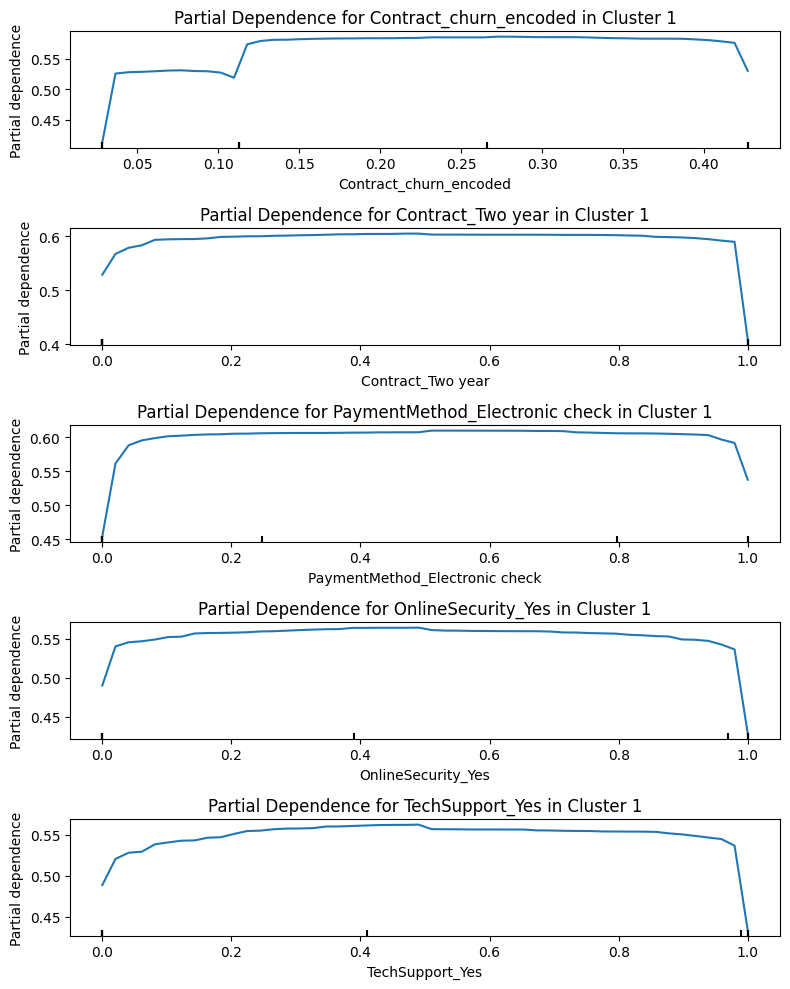

In [60]:
# Generate Partial Dependence Plots for the top 5 features
fig, ax = plt.subplots(len(top_5_features), 1, figsize=(8, 10))
for i, feature in enumerate(top_5_features):
    PartialDependenceDisplay.from_estimator(model, X_test, [feature], ax=ax[i], grid_resolution=50)
    ax[i].set_ylabel("Churn Probability")
    ax[i].set_title(f"Partial Dependence for {feature} in Cluster {cluster}")

plt.tight_layout()
plt.show()


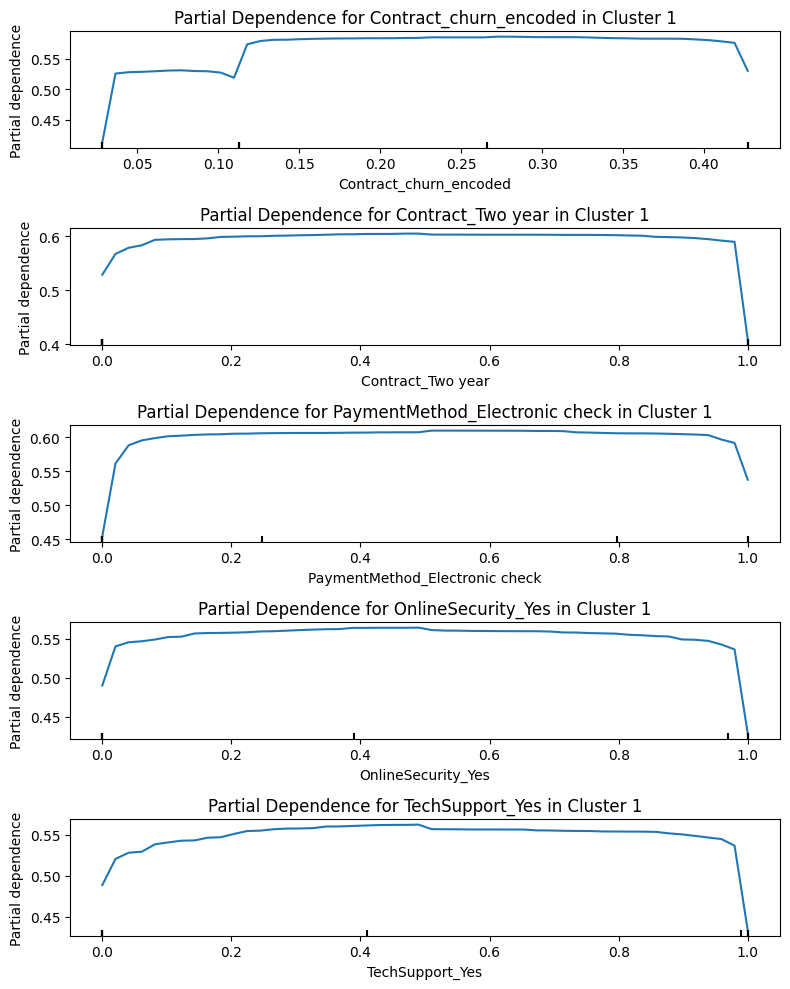

In [78]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Generate Partial Dependence Plots for the top 5 features
fig, ax = plt.subplots(len(top_5_features), 1, figsize=(8, 10))
for i, feature in enumerate(top_5_features):
    display = PartialDependenceDisplay.from_estimator(model, X_test, [feature], ax=ax[i], grid_resolution=50)
    
    # Force x and y axes to start from 0
    ax[i].set_xlim(left=0)  # x-axis starting from 0
    ax[i].set_ylim(bottom=0)  # y-axis starting from 0 (churn probability starting from 0)

    # Label and title
    ax[i].set_ylabel("Churn Probability")
    ax[i].set_title(f"Partial Dependence for {feature} in Cluster {cluster}")

plt.tight_layout()
plt.show()



Longer-term contracts (like two-year contracts) are linked to lower churn, so encourage longer commitments.

Electronic check users have higher churn risk. Consider encouraging them to switch to alternative payment methods. \

Additional services like Online Security and Tech Support may provide a slight improvement in retention. Highlighting the benefits of these services could help reduce churn.

## Marketing Insights:
TechSupport Service: Encourage customers in this cluster to subscribe to tech support services, 
which might help improve their experience and reduce churn risk.\

Online Security_Yes: Consider emphasizing the importance of online security services to customers, as they could contribute to customer retention, especially if security is a concern.

Payment Method Electronic Check: Explore whether there are issues with electronic check payments or if there’s a specific reason for higher churn. Encourage customers to switch to alternative, more stable payment methods, like automatic bank transfers or credit cards.


In [67]:
contract_columns = df.columns[df.columns.str.contains('Contract')]


df[contract_columns]

,Contract_churn_encoded,Contract_One year,Contract_Two year
0,0.427097,0.0,0.0
1,0.112695,1.0,0.0
2,0.427097,0.0,0.0
3,0.112695,1.0,0.0
4,0.427097,0.0,0.0
...,...,...,...
7038,0.112695,1.0,0.0
7039,0.112695,1.0,0.0
7040,0.427097,0.0,0.0
7041,0.427097,0.0,0.0


In [71]:
df.Contract_churn_encoded.value_counts()

0.427097    3875
0.028319    1695
0.112695    1473
Name: Contract_churn_encoded, dtype: int64

In [68]:
dk = pd.read_csv('telco_dataset.csv')

dk.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
dk[dk.Churn=='No'].Contract.value_counts()

Month-to-month    2220
Two year          1647
One year          1307
Name: Contract, dtype: int64

### Now for Cluster 0 : (Andrew = 1)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.cluster import KMeans

# Assuming `df` is your dataset and `X_scaled` is your scaled feature matrix

# Step 1: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Specify the cluster you want to analyze
cluster = 0  # Change this to 0, 1, or 2 as needed

# Filter data for the specified cluster
print(f"\n--- Analysis for Cluster {cluster} ---")
cluster_data = df[df['Cluster'] == cluster]

# Separate features and target
X = cluster_data.drop(columns=['Churn', 'Cluster', 'customerID'])  # Drop irrelevant columns
y = cluster_data['Churn']

# Step 2: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 4: Train a Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Variable Importance
feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("\nVariable Importance:")
print(feature_importances_df)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



--- Analysis for Cluster 0 ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       719
         1.0       0.92      0.89      0.91       690

    accuracy                           0.91      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.91      0.91      0.91      1409


Variable Importance:
                                  feature  importance
12                 Contract_churn_encoded    0.097981
7                            TotalCharges    0.088756
4                                  tenure    0.071916
8                                     CLV    0.070380
9                       AvgMonthlyCharges    0.056393
6                          MonthlyCharges    0.052436
2                                 Partner    0.049407
11                      AvgCLVbyTenureBin    0.039209
33                      Contract_Two year    0.036520
5                        PaperlessBilling    0.036035
3

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Get the top 5 features by importance
top_5_features = feature_importances_df['feature'].head(6).values



# Predict probabilities instead of classes
y_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of churn (class 1)

# Create a DataFrame for easy analysis
probabilities_df = X_test.copy()
probabilities_df['Churn_Probability'] = y_proba


# Check if each top feature exists in probabilities_df, and filter only those that do
top_features_in_df = [feature for feature in top_5_features if feature in probabilities_df.columns]

# Display the probabilities for the top available features
if top_features_in_df:
    print("\nChurn Probabilities for Top 5 Features in Cluster", cluster)
    print(probabilities_df[top_features_in_df + ['Churn_Probability']].head(6))
else:
    print("No matching top features found in probabilities_df columns.")


# Display the probabilities and corresponding feature values
#print("\nChurn Probabilities for Top 5 Features in Cluster", cluster)
#print(probabilities_df[top_5_features + ['Churn_Probability']].head())




Churn Probabilities for Top 5 Features in Cluster 0
      Contract_churn_encoded  TotalCharges     tenure         CLV  \
1550                0.427097    161.450000   6.000000  176.700000   
4475                0.427097    223.272835   5.064424  200.085898   
3271                0.254817    740.604766  11.095919  678.923548   
584                 0.427097    994.550000  15.000000  969.750000   
4069                0.427097    319.813247   9.299566  357.806662   
2217                0.112695    723.300000  30.000000  760.500000   

      AvgMonthlyCharges  MonthlyCharges  Churn_Probability  
1550          26.908333       29.450000               0.30  
4475          44.307968       39.688619               0.73  
3271          67.700950       62.012749               0.95  
584           66.303333       64.650000               0.56  
4069          34.541412       38.627932               0.99  
2217          24.110000       25.350000               0.09  


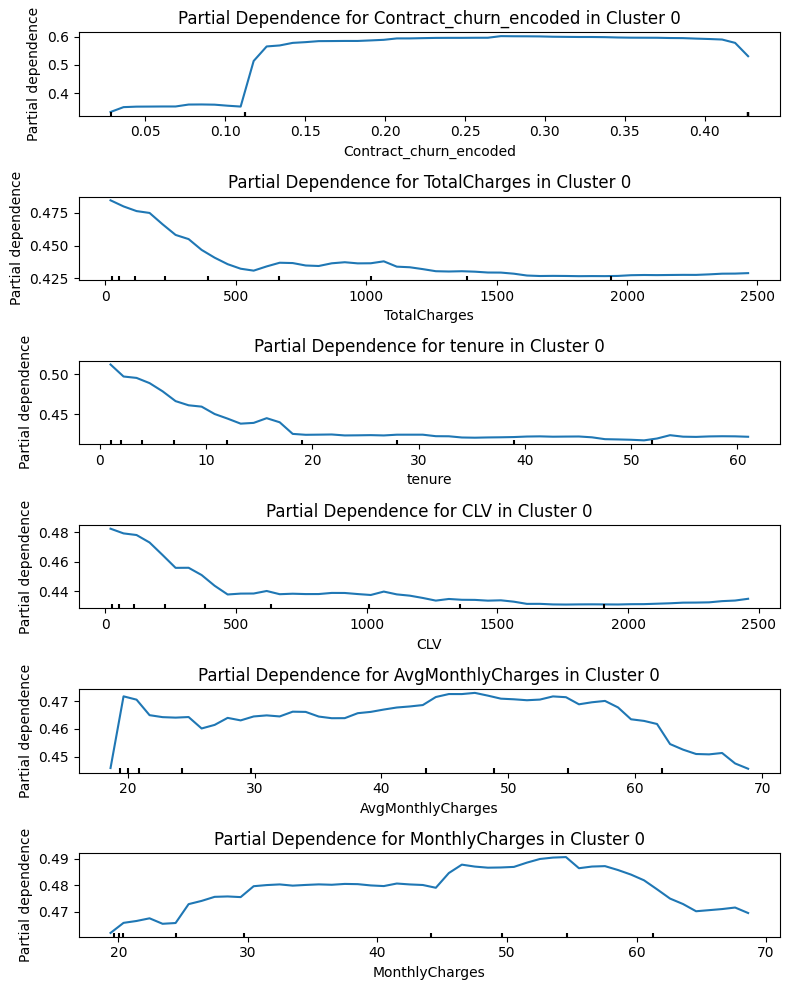

In [82]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Generate Partial Dependence Plots for the top 5 features
fig, ax = plt.subplots(len(top_5_features), 1, figsize=(8, 10))
for i, feature in enumerate(top_5_features):
    display = PartialDependenceDisplay.from_estimator(model, X_test, [feature], ax=ax[i], grid_resolution=50)
    
    # Force x and y axes to start from 0
    ax[i].set_xlim(left=0)  # x-axis starting from 0
    ax[i].set_ylim(bottom=0)  # y-axis starting from 0 (churn probability starting from 0)

    # Label and title
    ax[i].set_ylabel("Churn Probability")
    ax[i].set_title(f"Partial Dependence for {feature} in Cluster {cluster}")

plt.tight_layout()
plt.show()



## Marketing Insights:


### Contract_Churn_Encoded:
For customers with contract types associated with high churn risk, consider introducing retention strategies. \
This could include offering benefits for renewing contracts, flexible plans, 
or discounts to encourage commitment. \  
Target these customers with loyalty programs or incentives to reduce churn rates. \ 


### Total Charges:
High TotalCharges likely indicate long-term customers with higher lifetime value.  
Focus on rewarding loyal customers with high total charges, as they are already less likely to churn. 
Offer exclusive deals, appreciation events, or personalized offers to maintain this loyalty and prevent churn. \  
For new customers with low TotalCharges, consider early engagement programs to encourage continued usage and increase their lifetime value.


### Customer Lifetime Value:
Focus retention efforts on customers with mid-range CLV, as they are more likely to churn compared to high-CLV customers. \  
Offer additional value to mid-tier customers, such as upgrade opportunities, cross-sell offers to help move them into higher CLV segments. \  
This approach could help prevent churn and increase overall customer value.